In [2]:
!pip install opencv-python

In [3]:
import numpy as np
import cv2
import matplotlib.pylab as plt

# 1.2차원 데이트 표현

In [7]:
a=[[1,2,3],
   [2,5,6]]
print(a)
print(a[1][1])#to print certain element
print(a[0])

[[1, 2, 3], [2, 5, 6]]
5
[1, 2, 3]


In [8]:
b=np.array([[1,2,3],
           [4,5,6]])
print(b)

[[1 2 3]
 [4 5 6]]


In [10]:
print(b[1][2])
print(b[1,2])

print(b.shape)
print(b.shape[0],b.shape[1])

6
6
(2, 3)
2 3


# 2.Gray Image

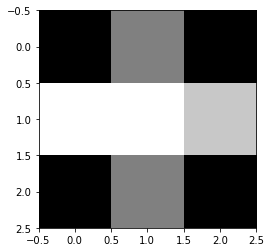

In [15]:
gray=np.array([[0,128,0],
             [255,255,200],
             [0,128,0]])
plt.imshow(gray,cmap='gray')#Way to print gray image

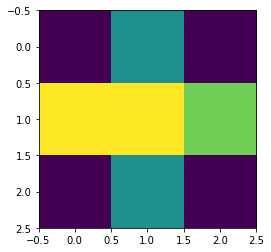

In [16]:
plt.imshow(gray)

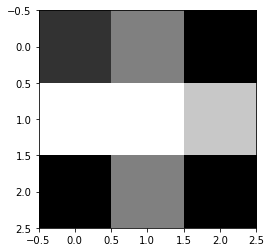

In [17]:
gray[0,0]=50
plt.imshow(gray,cmap='gray')

In [18]:
gray[:,:]=128 # : means all rows, : all columns
print(gray)

[[128 128 128]
 [128 128 128]
 [128 128 128]]


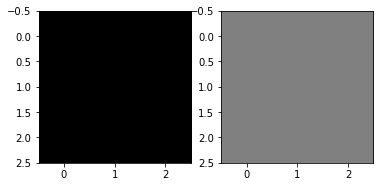

In [20]:
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')#It use scales,because all are the same it is considered as black
plt.subplot(1,2,2)
plt.imshow(gray,cmap='gray',vmin=0,vmax=255) # scale 0_255

# 3.color Image

In [21]:
color=np.zeros((2,4,3))
print(color.shape)

    

(2, 4, 3)


In [22]:
print(color)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


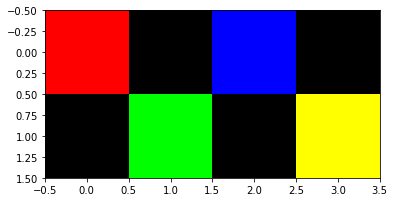

In [24]:
color[0,0]=[255,0,0] #color[0,0,:]=[255,0,0]
#color[0,0,0]=0
#color[0,0,1]=0
#color[0,0,2]=0

color[1,1]=[0,255,0]
color[0,2]=[0,0,255]
color[1,3]=[255,255,0]
plt.imshow(color)

In [25]:
R=color[:,:,0] #???
print(R)

[[255.   0.   0.   0.]
 [  0.   0.   0. 255.]]


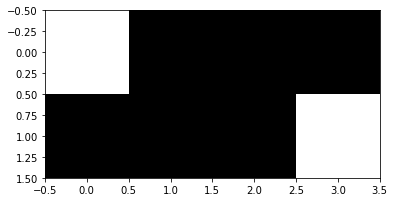

In [26]:
plt.imshow(R,cmap='gray')

# 4.Data types

In [28]:
a=np.array([[10,20,30],
          [200,210,200]])
print(a.dtype)

int32


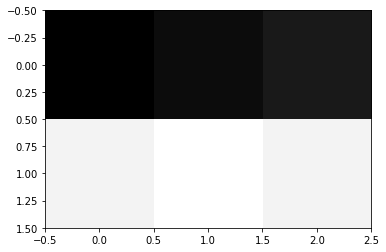

In [29]:
plt.imshow(a,cmap='gray')

uint8


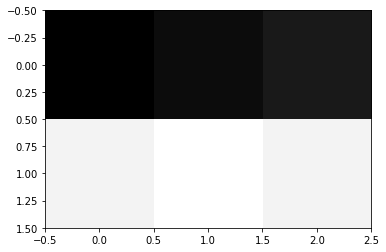

In [30]:
a=np.array([[10,20,30],
          [200,210,200]], dtype='uint8') #specify data types neeeded so as to save space
print(a.dtype)
plt.imshow(a,cmap='gray')

float64
[[0.03921569 0.07843137 0.11764706]
 [0.78431373 0.82352941 0.78431373]]


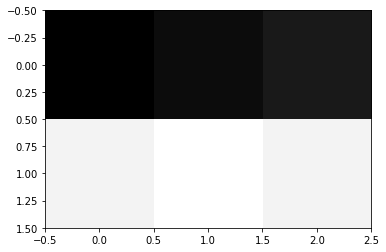

In [31]:
a=np.array([[10,20,30],
          [200,210,200]])/255
print(a.dtype)
print(a)
plt.imshow(a,cmap='gray')

# 5. OpenCV 기반 영상 읽기

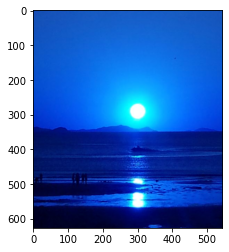

In [39]:
img=cv2.imread('sunset.jpg')
plt.imshow(img) #in openCV we don't have RGB instead we BGR, that's why our sunset become blue instead of orange

In [40]:
print(img.shape)

(627, 545, 3)


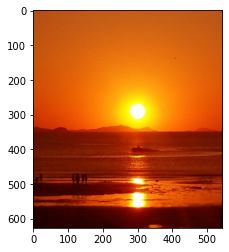

In [41]:
img2=img.copy()
img2[:,:,0]=img[:,:,2] #interchange between channel1(Red) and channel3(Blue)
img2[:,:,2]=img[:,:,0]

plt.imshow(img2)

(627, 545)


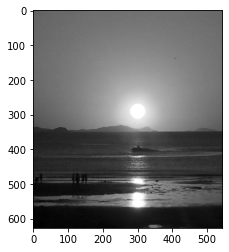

In [43]:
img=cv2.imread('sunset.jpg',0)# parameter 0 in imread, it generates gray image
print(img.shape)
plt.imshow(img,cmap='gray')

#Imshow is different from openCV so we have to create new imshow to use 

In [48]:
def imshow(tit,image):
    plt.title(tit)
    if len(image.shape)==3: #color_image
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image,cmap='gray')
    plt.show() #new imshow function to use

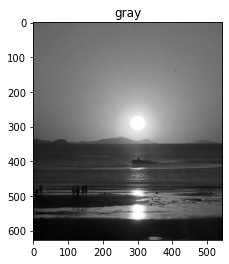

In [46]:
imshow("gray",img)

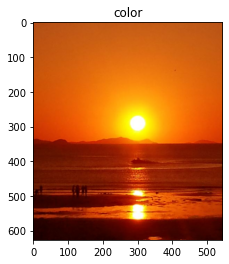

In [49]:
img=cv2.imread('sunset.jpg')
imshow("color",img)

# Channel segmentation

In [ ]:
img=cv2.imread('sunset.jpg')
print(img.shape)

In [51]:
R=np.zeros(img.shape, img.dtype)
G=np.zeros(img.shape, img.dtype)
B=np.zeros(img.shape, img.dtype)
print(R.shape)

(627, 545, 3)


In [52]:
R[:,:,0]=img[:,:,2]#R which was zeros,take Red components of img which img[:,:,2] due to it's from OpenCV
G[:,:,1]=img[:,:,1]
B[:,:,2]=img[:,:,0]

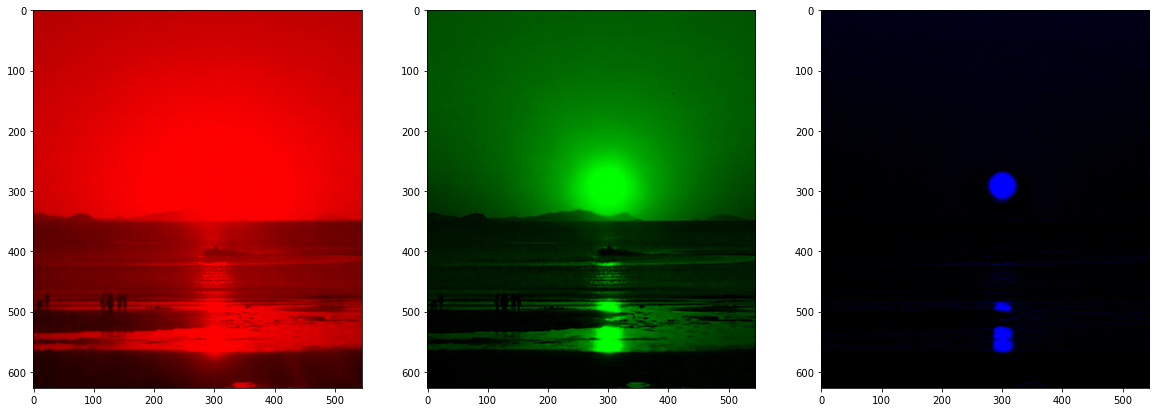

In [53]:
plt.figure(figsize=(20,30)) #가로:Horizontal 세로:Vertical 인치
plt.subplot(1,3,1)#1:one row, 3:column, 1: first image
plt.imshow(R)
plt.subplot(1,3,2)#1:one row, 3:column, 1: first image
plt.imshow(G)
plt.subplot(1,3,3)#1:one row, 3:column, 1: first image
plt.imshow(B)

# 6.openCV 기반 영상 출력

In [54]:
cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows() #in case of video, it generates image window

# 7.color 영상 처리

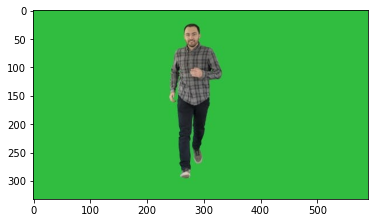

In [55]:
img=cv2.imread('chromakey.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

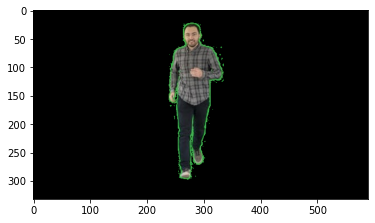

In [64]:
height,width,_=img.shape # _: standard for channel, in python..unnecessary variable we denote it as _

for h in range(0,height):
    for w in range(0,width):
        b=img[h,w,0]
        g=img[h,w,1]
        r=img[h,w,2]
        
        if(b>50 and b<70) and (g>150 and g<200) and (r>30 and r<60):
            img[h,w,:]=0

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# HomeWork_Week2

### 1. imshow()를 이용하여 출력

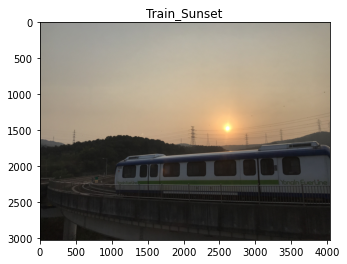

In [98]:
img1=cv2.imread("morning3.jpg")
imshow("Train_Sunset",img1)

### 2.RGB 채널로 분리한 이미지

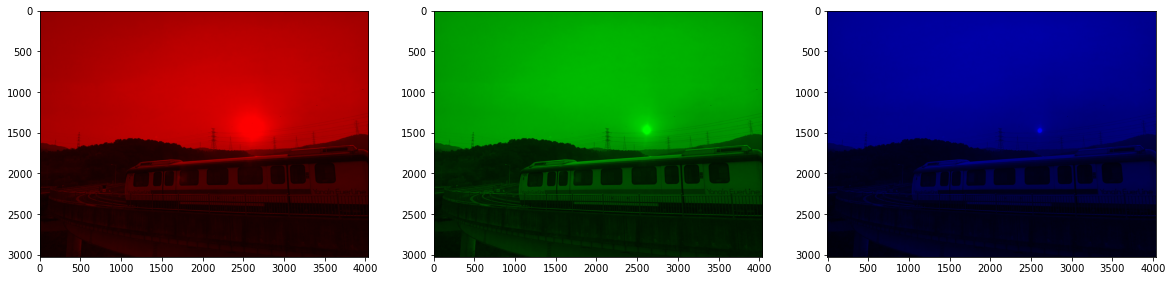

In [99]:
R=np.zeros(img1.shape, img1.dtype)
G=np.zeros(img1.shape, img1.dtype)
B=np.zeros(img1.shape, img1.dtype)

R[:,:,0]=img1[:,:,2]
G[:,:,1]=img1[:,:,1]
B[:,:,2]=img1[:,:,0]

plt.figure(figsize=(20,30)) 
plt.subplot(1,3,1)
plt.imshow(R)
plt.subplot(1,3,2)
plt.imshow(G)
plt.subplot(1,3,3)
plt.imshow(B)